<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




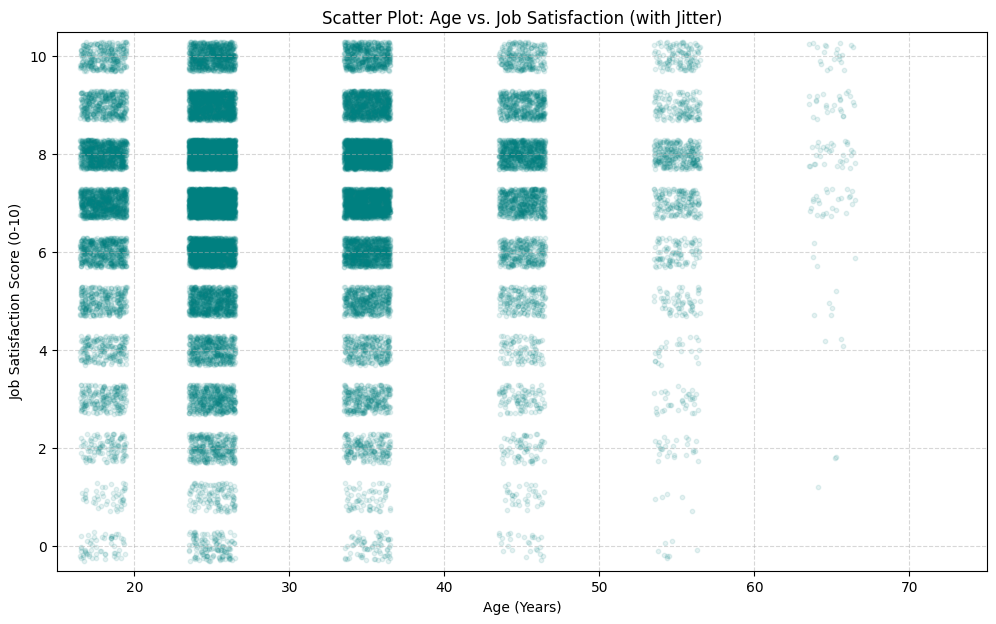

In [6]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, JobSat FROM main WHERE Age IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

df['Age_Numeric'] = df['Age'].str.extract('(\d+)').astype(float)

age_jitter = df['Age_Numeric'] + np.random.uniform(-1.5, 1.5, size=len(df))
sat_jitter = df['JobSat'] + np.random.uniform(-0.3, 0.3, size=len(df))

plt.figure(figsize=(12, 7))
plt.scatter(age_jitter, sat_jitter, alpha=0.1, color='teal', s=10)

plt.title('Scatter Plot: Age vs. Job Satisfaction (with Jitter)')
plt.xlabel('Age (Years)')
plt.ylabel('Job Satisfaction Score (0-10)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(15, 75)
plt.ylim(-0.5, 10.5)

plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


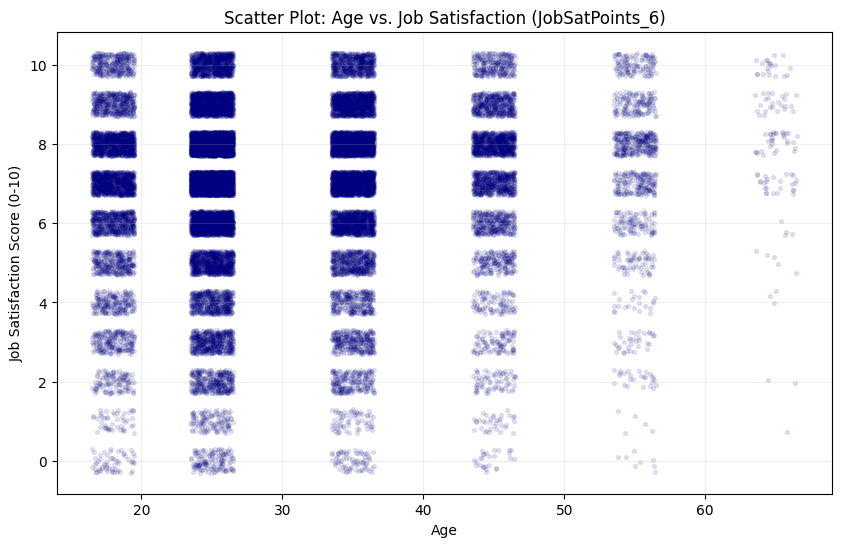

In [7]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, JobSat AS JobSatPoints_6 FROM main WHERE Age IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

df['Age_Numeric'] = df['Age'].str.extract('(\d+)').astype(float)

x_jitter = df['Age_Numeric'] + np.random.uniform(-1.5, 1.5, size=len(df))
y_jitter = df['JobSatPoints_6'] + np.random.uniform(-0.3, 0.3, size=len(df))

plt.figure(figsize=(10, 6))
plt.scatter(x_jitter, y_jitter, alpha=0.1, color='navy', s=8)

plt.title('Scatter Plot: Age vs. Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Score (0-10)')
plt.grid(True, alpha=0.2)

plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


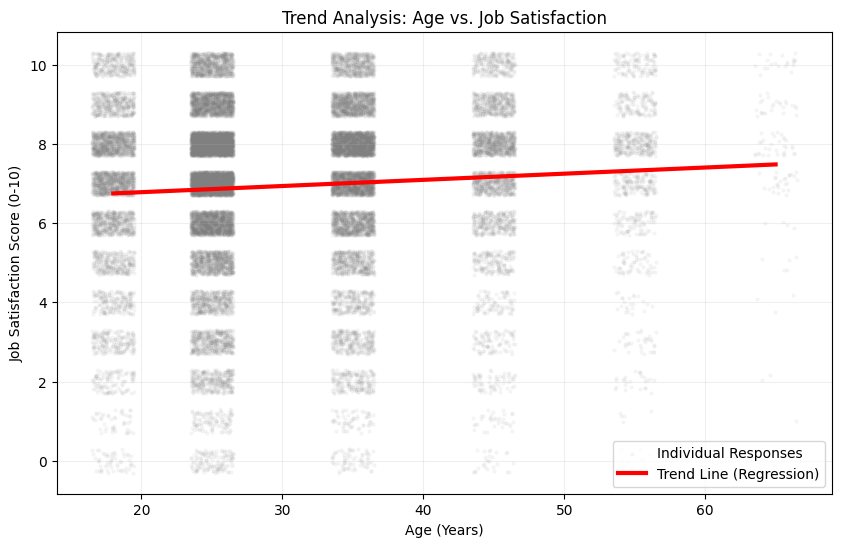

In [8]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, JobSat AS JobSatPoints_6 FROM main WHERE Age IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

df['Age_Numeric'] = df['Age'].str.extract('(\d+)').astype(float)

df_clean = df.dropna(subset=['Age_Numeric', 'JobSatPoints_6'])
x = df_clean['Age_Numeric']
y = df_clean['JobSatPoints_6']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))

plt.scatter(x + np.random.uniform(-1.5, 1.5, size=len(x)), 
            y + np.random.uniform(-0.3, 0.3, size=len(y)), 
            alpha=0.05, color='gray', s=5, label='Individual Responses')

plt.plot(np.sort(x), p(np.sort(x)), color='red', linewidth=3, label='Trend Line (Regression)')

plt.title('Trend Analysis: Age vs. Job Satisfaction')
plt.xlabel('Age (Years)')
plt.ylabel('Job Satisfaction Score (0-10)')
plt.legend()
plt.grid(True, alpha=0.2)

plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


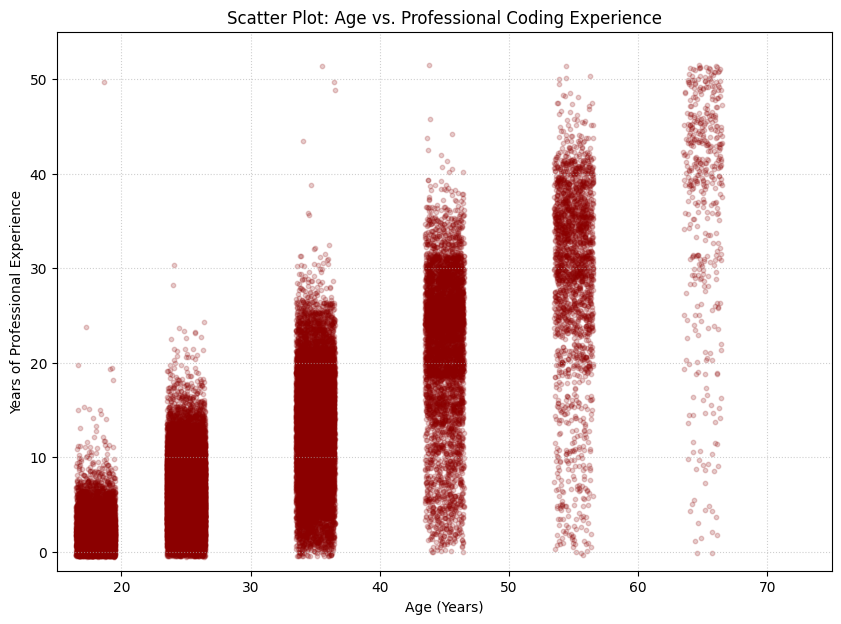

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, YearsCodePro FROM main WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL"
df = pd.read_sql_query(query, conn)

df['Age_Numeric'] = df['Age'].str.extract('(\d+)').astype(float)
df['Years_Numeric'] = df['YearsCodePro'].str.extract('(\d+)').astype(float)

x_jitter = df['Age_Numeric'] + np.random.uniform(-1.5, 1.5, size=len(df))
y_jitter = df['Years_Numeric'] + np.random.uniform(-1.5, 1.5, size=len(df))
                                                   
plt.figure(figsize=(10, 7))
plt.scatter(x_jitter, y_jitter, alpha=0.2, color='darkred', s=10)

plt.title('Scatter Plot: Age vs. Professional Coding Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Years of Professional Experience')
plt.grid(True, linestyle=':', alpha=0.6)

plt.xlim(15, 75)
plt.ylim(-2, 55)

plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


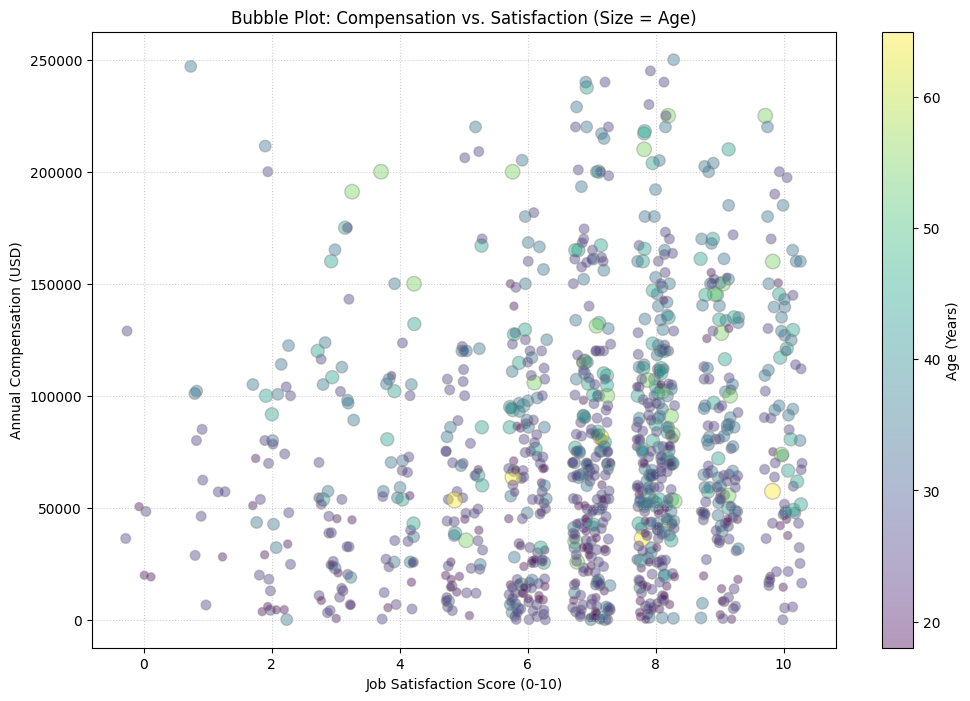

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('survey-data.sqlite')

query = """
SELECT ConvertedCompYearly, JobSat AS JobSatPoints_6, Age 
FROM main 
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSat IS NOT NULL 
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df['Age_Numeric'] = df['Age'].str.extract('(\d+)').astype(float)


df_filtered = df[df['ConvertedCompYearly'] <= 250000].sample(n=1000, random_state=42)

x = df_filtered['JobSatPoints_6']
y = df_filtered['ConvertedCompYearly']

bubble_size = df_filtered['Age_Numeric'] * 2 

plt.figure(figsize=(12, 8))

x_jitter = x + np.random.uniform(-0.3, 0.3, size=len(x))

scatter = plt.scatter(x_jitter, y, s=bubble_size, alpha=0.4, 
                      c=df_filtered['Age_Numeric'], cmap='viridis', edgecolors="grey")

plt.title('Bubble Plot: Compensation vs. Satisfaction (Size = Age)')
plt.xlabel('Job Satisfaction Score (0-10)')
plt.ylabel('Annual Compensation (USD)')
plt.colorbar(scatter, label='Age (Years)')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [ ]:
## Write your code here

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


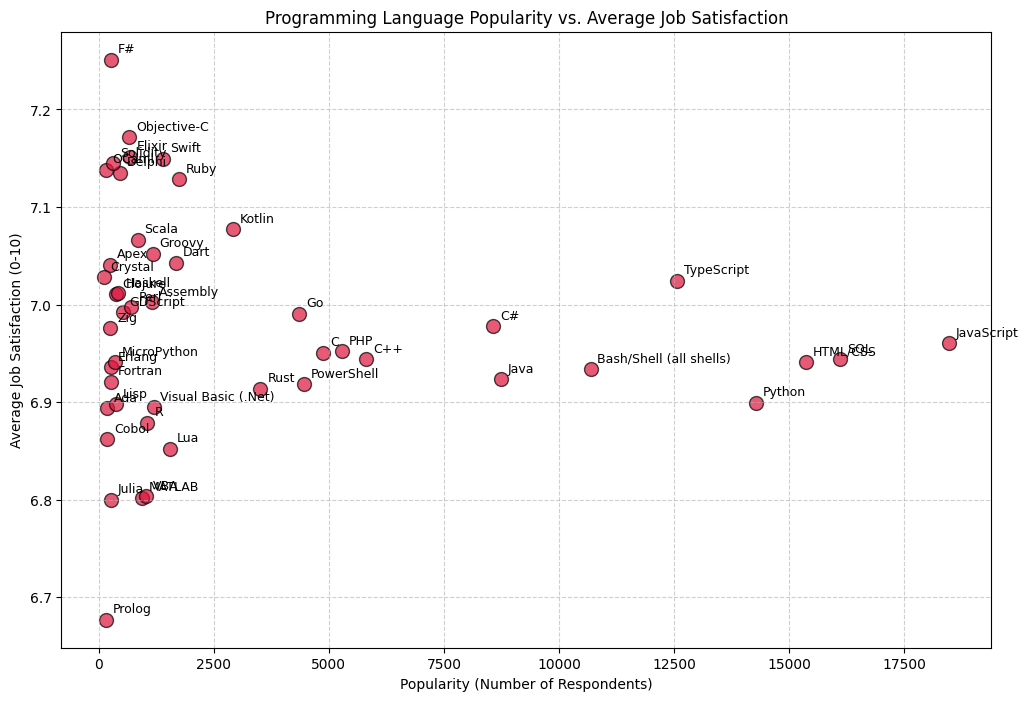

In [11]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT LanguageHaveWorkedWith, JobSat FROM main WHERE LanguageHaveWorkedWith IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

df_exploded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

lang_stats = df_exploded.groupby('Language').agg(
    Popularity=('JobSat', 'count'),
    AvgSatisfaction=('JobSat', 'mean')
).reset_index()

lang_stats = lang_stats[lang_stats['Popularity'] > 100]

plt.figure(figsize=(12, 8))
plt.scatter(lang_stats['Popularity'], lang_stats['AvgSatisfaction'], 
            alpha=0.7, c='crimson', s=100, edgecolors='black')

for i, txt in enumerate(lang_stats['Language']):
    plt.annotate(txt, (lang_stats['Popularity'].iat[i], lang_stats['AvgSatisfaction'].iat[i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Programming Language Popularity vs. Average Job Satisfaction')
plt.xlabel('Popularity (Number of Respondents)')
plt.ylabel('Average Job Satisfaction (0-10)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


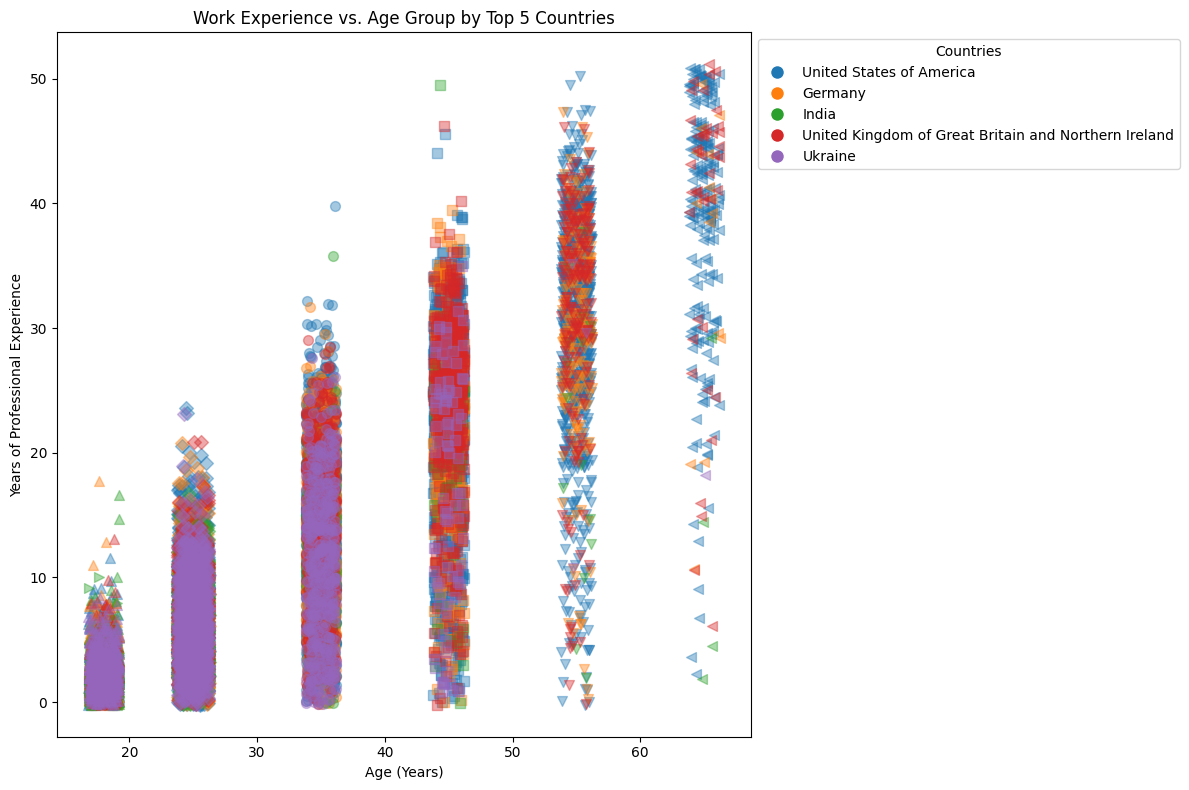

In [14]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('survey-data.sqlite')


query = "SELECT YearsCodePro, Age, Country FROM main WHERE YearsCodePro IS NOT NULL AND Age IS NOT NULL AND Country IS NOT NULL"
df = pd.read_sql_query(query, conn)


df['Years_Num'] = df['YearsCodePro'].str.extract('(\d+)').astype(float)
df['Age_Num'] = df['Age'].str.extract('(\d+)').astype(float)


top_5_countries = df['Country'].value_counts().head(5).index.tolist()
df_filtered = df[df['Country'].isin(top_5_countries)].copy()


unique_age_groups = df_filtered['Age'].unique()
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*'] 

age_map = {age: markers[i % len(markers)] for i, age in enumerate(unique_age_groups)}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
country_map = dict(zip(top_5_countries, colors))


plt.figure(figsize=(12, 8))

for country in top_5_countries:
    for age in unique_age_groups:
        subset = df_filtered[(df_filtered['Country'] == country) & (df_filtered['Age'] == age)]
        if not subset.empty:
            # Adding jitter to prevent overlapping
            x_jit = subset['Age_Num'] + np.random.uniform(-1.2, 1.2, size=len(subset))
            y_jit = subset['Years_Num'] + np.random.uniform(-1.2, 1.2, size=len(subset))
            
            plt.scatter(x_jit, y_jit, 
                        color=country_map[country], 
                        marker=age_map[age], 
                        alpha=0.4, s=50)


plt.title('Work Experience vs. Age Group by Top 5 Countries')
plt.xlabel('Age (Years)')
plt.ylabel('Years of Professional Experience')


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=c,
                          markerfacecolor=country_map[c], markersize=10) for c in top_5_countries]
plt.legend(handles=legend_elements, title="Countries", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

conn.close()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
